In [1]:
import sys
sys.path.append("../python/")
from NGC5533_functions import *

In [2]:
d_Mdblintrho() #current

80061849378.99991

In [8]:
def newM(h=h_c,d_rho00=drho00_c):    #new limits
    rho_rz_r = lambda z,r,h,d_rho00: d_rho_rz(r,z,h,d_rho00)*r
    Mintrho = lambda r,h,d_rho00: si.quad(rho_rz_r, -(R(h)+d(h)), R(h)+d(h), args=(r,h,d_rho00))[0]
    return si.quad(Mintrho,0,np.inf,args=(h,d_rho00))[0]
newM()

80061849378.99992

In [4]:
#original
def oldM(h=h_c,d_rho00=drho00_c):    #M double-integral rho
    rho_rz_r = lambda z,r,h,d_rho00: d_rho_rz(r,z,h,d_rho00)*r
    Mintrho = lambda r,h,d_rho00: si.quad(rho_rz_r, -(125), 125, args=(r,h,d_rho00))[0]
    return si.quad(Mintrho,0,125,args=(h,d_rho00))[0]
oldM()

80061849289.37642

The "newM" code is now the current code, as almost no difference is present in results but it should be more robust to varying h. This version goes up to where the density goes to zero instead of arbitrarily going to 125.

In [12]:
#current
d_innerintegral(1,1)

-25163286.69026104

In [14]:
def new_innerintegral(u,r,h=h_c,d_rho00=drho00_c):
    return u*si.quad(d_innerfunc, 0, R(h)+d(h), args=(r,u,h,d_rho00))[0]

new_innerintegral(1,1)

-25163286.69033877

In [15]:
def old_innerintegral(u,r,h=h_c,d_rho00=drho00_c): #Integrate Function
    #Matches Casertano, with the exception of the 125 limit due to computing limitations
    #u was passed from outerintegral to prevent errors.
    return u*si.quad(d_innerfunc, 0, 125, args=(r,u,h,d_rho00))[0]
old_innerintegral(1,1)

-25163286.69026104

The same changes were made to the d_innerintegral term for the same reasons listed above.

Below are graphs of a currently-calculated version of the disk and the saved version of the disk.

In [20]:
r = np.linspace(0,120)
saved = d_v(r,path='../fitting')
calc = d_v(r,load=False)

../python/NGC5533_functions.py:362: RuntimeWarning: divide by zero encountered in double_scalars
  x = lambda r,u,xi: (r**2+u**2+xi**2)/(2*r*u)
../python/NGC5533_functions.py:364: RuntimeWarning: invalid value encountered in double_scalars
  return x(r,u,xi)-np.sqrt(x(r,u,xi)**2-1)
../python/NGC5533_functions.py:411: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return u*si.quad(d_innerfunc, 0, R(h)+d(h), args=(r,u,h,d_rho00))[0]
../python/NGC5533_functions.py:416: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return si.quad(d_innerintegral, 0, np.inf, args=(r,h,d_rho00))[0]
../python/NGC5533_functions.py:416: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advis

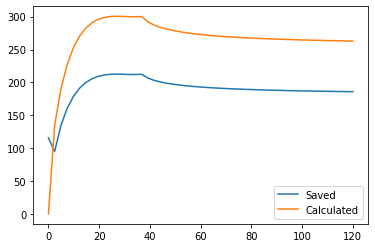

In [23]:
import matplotlib.pyplot as plt

plt.plot(r,saved,label='Saved')
plt.plot(r,calc,label='Calculated')
plt.legend()

plt.show()